In [631]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [632]:
df = pd.read_csv('/Users/parthbansal/Desktop/train.csv')

df

#891 rows, 12 columns 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [633]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [634]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [635]:
# 687 of 891 Cabin values are missing. Hence, we are dropping that column 
df = df.drop("Cabin", axis = 1)

/Users/parthbansal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

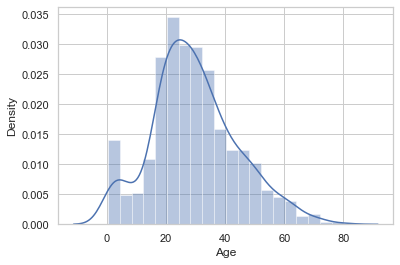

In [636]:
sns.distplot(df[df['Age'].notnull()]['Age'])

In [637]:
# Filling age in with an interpolation method
df["Age"] = df["Age"].interpolate()

In [638]:
# Dropping the remaining two two datapoints. Hence, no missing values
df = df.df = df.dropna()
len(df)

#889 rows

/var/folders/0y/n_xgd2n97837m629ymdq84rr0000gn/T/ipykernel_71132/107283531.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df = df.df = df.dropna()


889

In [639]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [640]:
# Embarked: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [641]:
# Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
df['Pclass'].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [642]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.680450,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.872944,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.500000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/Users/parthbansal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

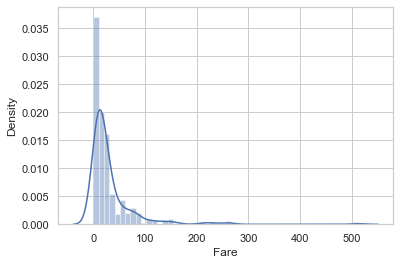

In [643]:
# Majority of the passengers paid below the mean of 32
sns.distplot(df['Fare'])

/Users/parthbansal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

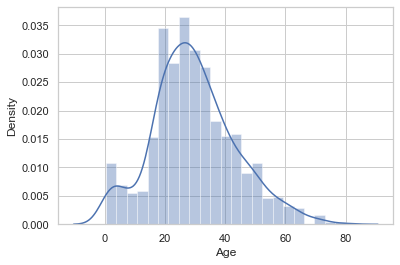

In [644]:
sns.distplot(df['Age'])

In [645]:
# Additionally, dropping the "PassengerId", "Name", and "Ticket" columns
df = df.drop(["PassengerId", "Name", "Ticket"], axis = 1)

In [646]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<AxesSubplot:xlabel='Survived', ylabel='count'>

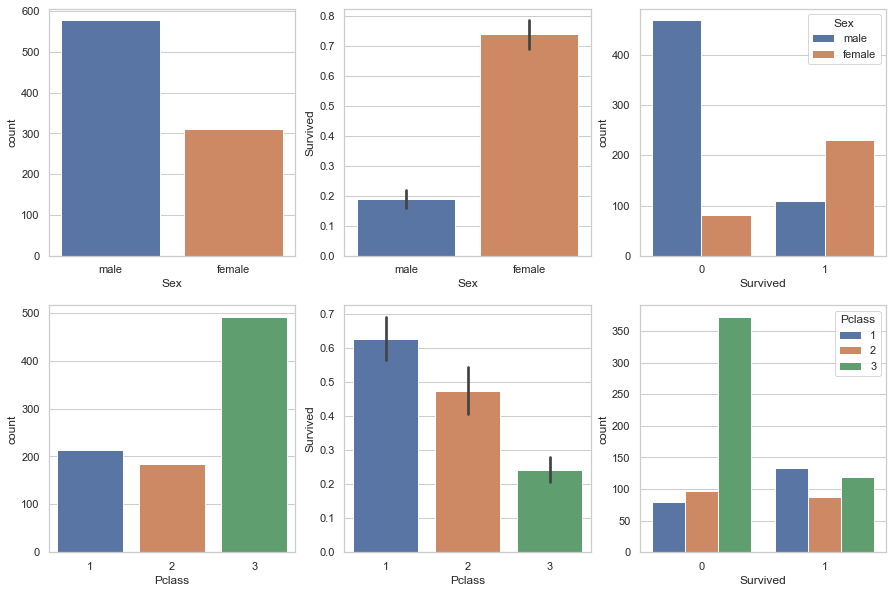

In [647]:
fig, ax = plt.subplots(2, 3, figsize = (15, 10))
sns.countplot(data = df, x = "Sex", ax = ax[0, 0])
sns.barplot(x = "Sex", y = "Survived", data = df, ax = ax[0, 1])
sns.countplot(data = df, x = "Survived", ax = ax[0, 2], hue = "Sex")

sns.countplot(data = df, x = "Pclass", ax = ax[1, 0])
sns.barplot(x = "Pclass", y = "Survived", data = df, ax = ax[1, 1])
sns.countplot(data = df, x = "Survived", ax = ax[1, 2], hue = "Pclass")

In [648]:
print("Percentage of females who survived: ", round(df["Survived"][df["Sex"] == 'female'].value_counts(normalize = True)[1]*100, 4), "%", sep = "")
print("Percentage of males who survived: ", round(df["Survived"][df["Sex"] == 'male'].value_counts(normalize = True)[1]*100, 4), "%", sep = "")

Percentage of females who survived: 74.0385%
Percentage of males who survived: 18.8908%


In [649]:
# SibSp: Number of siblings and spouses of the passenger aboard
df['Parch'].value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [650]:
# Parch: Number of parents and children of the passenger aboard
df['SibSp'].value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

/Users/parthbansal/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


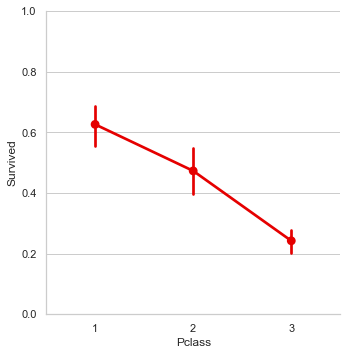

In [651]:
sns.set(style="whitegrid")
g = sns.PairGrid(data=df, x_vars=['Pclass'], y_vars='Survived', size=5)
g.map(sns.pointplot, color=sns.xkcd_rgb["red"])
g.set(ylim=(0, 1))

In [652]:
#sns.countplot(data = df, x = "Pclass", ax = ax[1, 0])
#sns.barplot(x = "Pclass", y = "Survived", data = df, ax = ax[1, 1])
#sns.countplot(data = df, x = "Survived", ax = ax[1, 2], hue = "Pclass")

/Users/parthbansal/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


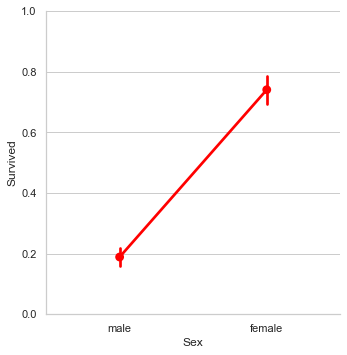

In [653]:
h = sns.PairGrid(data=df, x_vars=['Sex'], y_vars='Survived', size=5)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

In [654]:
encoded_data = pd.get_dummies(df, columns = ['Sex', 'Embarked'])
new_df = encoded_data
new_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [655]:
new_df["Child"] = new_df["Age"].apply(lambda x: 1 if x <= 12 else 0)
new_df["Family"] = new_df["SibSp"] + new_df["Parch"]
new_df = new_df.drop(["SibSp", "Parch"], axis = 1)

In [656]:
new_df["Alone"] = new_df["Family"].apply(lambda x: 1 if x == 0 else 0)

In [657]:
new_df.head()

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Child,Family,Alone
0,0,3,22.0,7.2500,0,1,0,0,1,0,1,0
1,1,1,38.0,71.2833,1,0,1,0,0,0,1,0
2,1,3,26.0,7.9250,1,0,0,0,1,0,0,1
3,1,1,35.0,53.1000,1,0,0,0,1,0,1,0
4,0,3,35.0,8.0500,0,1,0,0,1,0,0,1


In [658]:
new_df['Child'].value_counts()

0    811
1     78
Name: Child, dtype: int64

In [659]:
new_df['Family'].value_counts()

0     535
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family, dtype: int64

In [660]:
new_df['Alone'].value_counts()

1    535
0    354
Name: Alone, dtype: int64

In [661]:
X, y = new_df.drop('Survived', axis =1), new_df['Survived']
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.8, test_size = 0.2, stratify = y)

In [662]:
def dmp_first_classifier(model):
    classifier = model()
    classifier.fit(train_X, train_y)
    print(classifier.score(test_X, test_y))
    return classifier

In [663]:
here_we_go = dmp_first_classifier(LogisticRegression)

0.8089887640449438


/Users/parthbansal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [664]:
# Running Logistic Regression
clf = LogisticRegression()
clf.fit(train_X, train_y)
y_pred_log_reg = clf.predict(test_X)
acc_log_reg = round( clf.score(test_X, test_y) * 100, 2)
print (str(acc_log_reg) + ' percent')

80.9 percent


/Users/parthbansal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [665]:
pd.DataFrame(classification_report(test_y, y_pred_log_reg, output_dict = True)).T

,precision,recall,f1-score,support
0,0.839286,0.854545,0.846847,110.000000
1,0.757576,0.735294,0.746269,68.000000
accuracy,0.808989,0.808989,0.808989,0.808989
macro avg,0.798431,0.794920,0.796558,178.000000
weighted avg,0.808071,0.808989,0.808424,178.000000


In [666]:
# Running Linear SVC
clf = LinearSVC()
clf.fit(train_X, train_y)
y_pred_linear_svc = clf.predict(test_X)
acc_linear_svc = round( clf.score(test_X, test_y) * 100, 2)
print (str(acc_linear_svc))

79.78


/Users/parthbansal/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [667]:
# Running SVC
svc = LinearSVC().fit(train_X, train_y)
acc_svc = (svc.score(test_X, test_y)) * 100
print(acc_svc)

75.84269662921348


/Users/parthbansal/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [668]:
# Running GaussianN()
x = GaussianNB()
x.fit(train_X, train_y)
y_pred_naive_bayes = x.predict(test_X)
acc_gnb = round( x.score(test_X, test_y) * 100, 2)
print(str(acc_gnb))

81.46


In [669]:
# Running KNN
x = KNeighborsClassifier(n_neighbors = 3)
x.fit(train_X, train_y)
y_pred_knn = x.predict(test_X)
acc_knn = round(x.score(test_X, test_y) * 100, 2)
print(str(acc_knn))

70.79


In [670]:
# Running Perceptron 
clf = Perceptron()
clf.fit(train_X, train_y)
y_pred_perceptron = clf.predict(test_X)
acc_perceptron = round( clf.score(test_X, test_y) * 100, 2)
print (str(acc_perceptron))

80.9


In [671]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Running Random Forest 
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(train_X, train_y)
y_pred_random_forest = clf.predict(test_X)
acc_random_forest = round( clf.score(test_X, test_y) * 100, 2)
print (str(acc_random_forest))

81.46


In [693]:
# Running SGDC
sgd = SGDClassifier()
sgd.fit(train_X, train_y)
y_pred = sgd.predict(test_X)
acc_sgd = (accuracy_score(test_y, y_pred)) * 100
acc_sgd

50.0

In [673]:
# Running Decision Tree
clf = DecisionTreeClassifier()
clf.fit(train_X, train_y)
y_pred_decision_tree = clf.predict(test_X)
acc_decision_tree = round( clf.score(test_X, test_y) * 100, 2)
print (str(acc_decision_tree))

82.02


In [674]:
feature_imp = pd.Series(rf.feature_importances_, index = train_X.columns).sort_values(ascending = False)
feature_imp

Age           0.271826
Fare          0.246193
Sex_female    0.150973
Sex_male      0.122062
Pclass        0.080646
Family        0.064504
Child         0.017826
Alone         0.014993
Embarked_S    0.012471
Embarked_C    0.011183
Embarked_Q    0.007324
dtype: float64

In [694]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Decent'],
    
    'Score': [acc_log_reg, acc_svc, acc_linear_svc, 
              acc_knn,  acc_decision_tree, acc_random_forest, acc_gnb, 
              acc_perceptron, acc_sgd]
    })

models.sort_values(by = "Score", ascending = False)

,Model,Score
4,Decision Tree,82.020000
5,Random Forest,81.460000
6,Naive Bayes,81.460000
0,Logistic Regression,80.900000
7,Perceptron,80.900000
2,Linear SVC,79.780000
1,Support Vector Machines,75.842697
3,KNN,70.790000
8,Stochastic Gradient Decent,50.000000


### Testing the Holdout File 

In [676]:
hd = pd.read_csv("/Users/parthbansal/Desktop/holdout_test.csv")
hd.head()

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,NaN,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,NaN,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,NaN,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,NaN,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,NaN,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [677]:
hd.isnull().sum()

Survived       418
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [678]:
hd = hd.drop("Cabin", axis = 1)

In [679]:
hd["Age"] = hd["Age"].interpolate()

/Users/parthbansal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

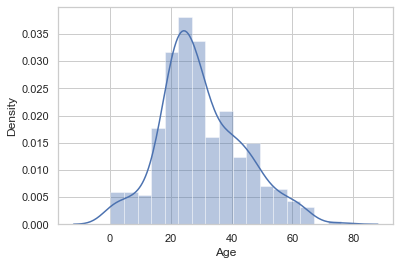

In [680]:
sns.distplot(hd['Age'])

In [681]:
hd = hd.drop(["PassengerId", "Name", "Ticket"], axis = 1)

In [682]:
hd["Child"] = hd["Age"].apply(lambda x: 1 if x <= 12 else 0)
hd["Family"] = hd["SibSp"] + hd["Parch"]
hd = hd.drop(["SibSp", "Parch"], axis = 1)

In [683]:
encoded_data = pd.get_dummies(hd, columns = ['Sex', 'Embarked'])
hd = encoded_data

In [684]:
hd["Alone"] = hd["Family"].apply(lambda x: 1 if x == 0 else 0)

In [685]:
hd.isnull().sum()

Survived      418
Pclass          0
Age             0
Fare            1
Child           0
Family          0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Alone           0
dtype: int64

In [686]:
hd.head()

,Survived,Pclass,Age,Fare,Child,Family,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Alone
0,NaN,3,34.5,7.8292,0,0,0,1,0,1,0,1
1,NaN,3,47.0,7.0000,0,1,1,0,0,0,1,0
2,NaN,2,62.0,9.6875,0,0,0,1,0,1,0,1
3,NaN,3,27.0,8.6625,0,0,0,1,0,0,1,1
4,NaN,3,22.0,12.2875,0,2,1,0,0,0,1,0


In [687]:
hd = hd[hd['Fare'].notna()]

In [688]:
X_train = X
y_train = y
X_test = hd.drop('Survived', axis =1)
y_test = hd['Survived']

In [689]:
rf = RandomForestClassifier(n_estimators = 100) 
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

/Users/parthbansal/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [690]:
del hd["Survived"]
hd.loc[:, "Survived"] = y_pred

/var/folders/0y/n_xgd2n97837m629ymdq84rr0000gn/T/ipykernel_71132/3077783703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hd.loc[:, "Survived"] = y_pred


In [691]:
hd.to_csv('/Users/parthbansal/Desktop/Titanic Results From 12372257.csv', index=False)

In [692]:
hd["Survived"].value_counts()

0    289
1    128
Name: Survived, dtype: int64

In [695]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Decent'],
    
    'Score': [acc_log_reg, acc_svc, acc_linear_svc, 
              acc_knn,  acc_decision_tree, acc_random_forest, acc_gnb, 
              acc_perceptron, acc_sgd]
    })

models.sort_values(by = "Score", ascending = False)

,Model,Score
4,Decision Tree,82.020000
5,Random Forest,81.460000
6,Naive Bayes,81.460000
0,Logistic Regression,80.900000
7,Perceptron,80.900000
2,Linear SVC,79.780000
1,Support Vector Machines,75.842697
3,KNN,70.790000
8,Stochastic Gradient Decent,50.000000


## Model Reasoning 

For the Titanic Problem, I ran KNN, Naive Bayes, Random Forest, Logisitc Regression, Linear SVC, Stochastic Gradient Descent and Perceptron. For the most part, most the models performed well or failrly well, with the exception of Stochastic Gradient Descent Classifier. This information is displayed by the table above. As the dataset was relatively small, we could have used multiple models. However, I decided to go with Random Forest. This is an ensemble learning method that can handle both categorical and continuous data. Random Forest can be a good choice for the Titanic Survival problem as it can capture non-linear relationships between the features and the target variable, and it can also handle missing values. Some of the pros for this model are its capabilites to handle non-linearity and missing data. Moreover, it is relatively easy to understadnd when compared to other ML models. However, Random Forest can be prone to overfitting if the number of trees in the forest is too large. Fortunately, this dataset isn't too large. Also, it is computationally very expensive if the data is larger. Since none of these factors matter as our dataset is small, Random Forest is a good model to solve this problem. 